In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
%matplotlib inline

In [4]:
dataset = pd.read_csv("C:/Users/HP/Desktop/MLSDIA/Data/Titanic-Dataset.csv")
dataset.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
def input_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [54]:
dataset['Age']=dataset[['Age','Pclass']].apply(input_age,axis=1)

<AxesSubplot:>

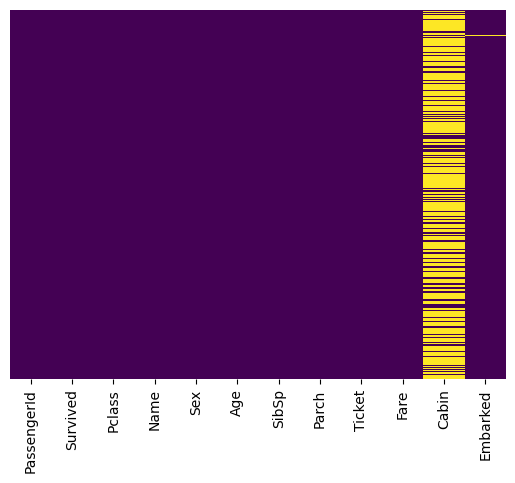

In [55]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [56]:
X = dataset[['Fare', 'Age']].values
y = dataset[['Survived']].values

In [57]:
X

array([[ 7.25  , 22.    ],
       [71.2833, 38.    ],
       [ 7.925 , 26.    ],
       ...,
       [23.45  , 24.    ],
       [30.    , 26.    ],
       [ 7.75  , 32.    ]])

In [58]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-0.50244517, -0.53383369],
       [ 0.78684529,  0.67489052],
       [-0.48885426, -0.23165264],
       ...,
       [-0.17626324, -0.38274316],
       [-0.04438104, -0.23165264],
       [-0.49237783,  0.22161894]])

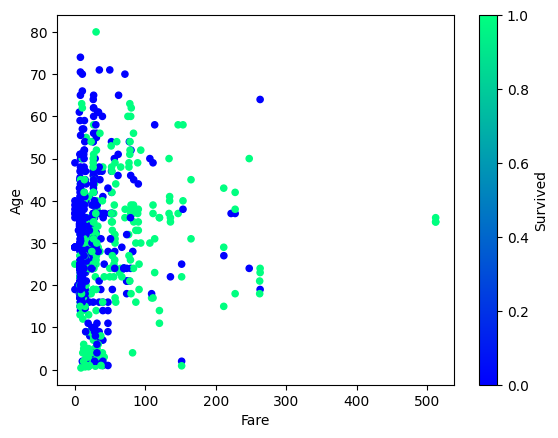

In [59]:
dataset.plot.scatter(x='Fare',y='Age', c='Survived', colormap='winter')
plt.show()

In [60]:
# La fonction sigmoide
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [61]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [62]:
# Modèle
def modele(X, W, b):
    Z = X.dot(W) + b
    A = sigmoid(Z)
    return A

In [63]:
def log_loss(y, A):
    return 1/len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

In [64]:
def gradients(X, A, y):
    dW = 1/len(y) * np.dot(X.T, A - y)
    db = 1/len(y) * np.sum(A - y)
    return (dW, db)

In [65]:
def optimisation(X, W, b, A, y, learning_rate):
    dW, db = gradients(X, A, y)
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

In [66]:
def predict(X, W, b):
    A = modele(X, W, b)
    print(A)
    return A >= 0.5

In [67]:
def regression_logistique(X, y, learning_rate=0.01, n_iter=1000):
  # Initialisation
    W, b = initialisation(X)
    loss_history = []
  # Entrainement
    for i in range(n_iter):
        A = modele(X, W, b)
        loss_history.append(log_loss(y, A))
        W, b = optimisation(X, W, b, A, y, learning_rate=0.1)

  # Prediction
    plt.plot(loss_history)
    plt.xlabel('n_iteration')
    plt.ylabel('Log_loss')
    plt.title('Evolution des erreurs')
    return W,b

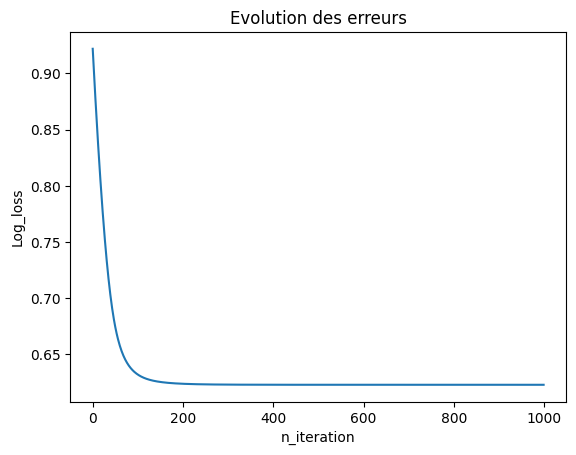

In [68]:
W,b=regression_logistique(X, y)

In [78]:
#Affichage de la matrice de confusion

from sklearn.metrics import confusion_matrix
y_pred = predict(X, W, b)
cm = confusion_matrix(y, y_pred)

[[0.32071977]
 [0.51263326]
 [0.30998022]
 [0.45007745]
 [0.28193901]
 [0.31839856]
 [0.37540404]
 [0.44489863]
 [0.31797563]
 [0.43612887]
 [0.41994214]
 [0.27238526]
 [0.33025166]
 [0.35047569]
 [0.34998327]
 [0.24805724]
 [0.47750141]
 [0.31798854]
 [0.32918236]
 [0.31405072]
 [0.3447488 ]
 [0.30175176]
 [0.34718244]
 [0.40588623]
 [0.42252148]
 [0.35436042]
 [0.31405072]
 [0.96967259]
 [0.31635302]
 [0.31641155]
 [0.33401412]
 [0.78455682]
 [0.31589761]
 [0.20330906]
 [0.59385718]
 [0.41955343]
 [0.31406547]
 [0.32690105]
 [0.37415225]
 [0.36264968]
 [0.27139249]
 [0.35383559]
 [0.31641155]
 [0.52443385]
 [0.33300078]
 [0.3169556 ]
 [0.34381668]
 [0.31589761]
 [0.36688946]
 [0.373389  ]
 [0.50155486]
 [0.3260048 ]
 [0.49306781]
 [0.36561481]
 [0.37490698]
 [0.37339303]
 [0.33575051]
 [0.29953236]
 [0.46057282]
 [0.51576045]
 [0.32064589]
 [0.5480173 ]
 [0.53569063]
 [0.46495669]
 [0.34422508]
 [0.34288225]
 [0.30921502]
 [0.33401227]
 [0.33994894]
 [0.312558  ]
 [0.29956817]
 [0.49

In [74]:
from sklearn.metrics import accuracy_score
y_pred = predict(X, W, b)
print("Accuracy=",accuracy_score(y, y_pred))
cm = confusion_matrix(y, y_pred)

[[0.32071977]
 [0.51263326]
 [0.30998022]
 [0.45007745]
 [0.28193901]
 [0.31839856]
 [0.37540404]
 [0.44489863]
 [0.31797563]
 [0.43612887]
 [0.41994214]
 [0.27238526]
 [0.33025166]
 [0.35047569]
 [0.34998327]
 [0.24805724]
 [0.47750141]
 [0.31798854]
 [0.32918236]
 [0.31405072]
 [0.3447488 ]
 [0.30175176]
 [0.34718244]
 [0.40588623]
 [0.42252148]
 [0.35436042]
 [0.31405072]
 [0.96967259]
 [0.31635302]
 [0.31641155]
 [0.33401412]
 [0.78455682]
 [0.31589761]
 [0.20330906]
 [0.59385718]
 [0.41955343]
 [0.31406547]
 [0.32690105]
 [0.37415225]
 [0.36264968]
 [0.27139249]
 [0.35383559]
 [0.31641155]
 [0.52443385]
 [0.33300078]
 [0.3169556 ]
 [0.34381668]
 [0.31589761]
 [0.36688946]
 [0.373389  ]
 [0.50155486]
 [0.3260048 ]
 [0.49306781]
 [0.36561481]
 [0.37490698]
 [0.37339303]
 [0.33575051]
 [0.29953236]
 [0.46057282]
 [0.51576045]
 [0.32064589]
 [0.5480173 ]
 [0.53569063]
 [0.46495669]
 [0.34422508]
 [0.34288225]
 [0.30921502]
 [0.33401227]
 [0.33994894]
 [0.312558  ]
 [0.29956817]
 [0.49

In [77]:
y_pred2 = predict(np.array([1,2]), W, b)
print(y_pred2)

[0.4891879]
[False]


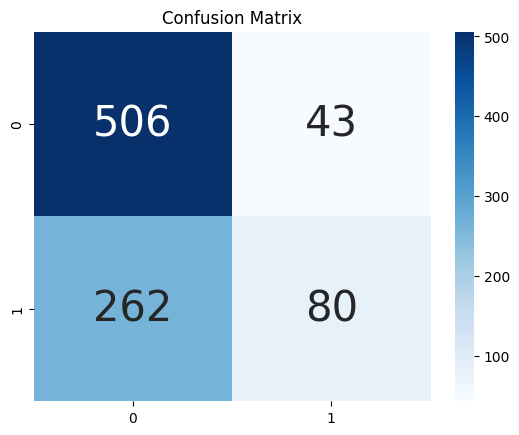

In [75]:
# Plot confusion matrix
import seaborn as sns
import pandas as pd
# confusion matrix sns heatmap 
## https://www.kaggle.com/agungor2/various-confusion-matrix-plots
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()